# **Sentiment Analysis and Text Preprocessing on the Sentiment140 Twitter Dataset: Exploring Negative and Positive Tweets**

---


**Importing Libraries**
---




1.   Pandas
2.   Numpy
3.   String
4.   Nltk
5.   Collections
6.   WordCloud
7.   Matplotlib



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

**Reading Sentiment140 DATA**
---
---



In [30]:
sentiment_data=pd.read_csv("/content/Project_Data.csv",encoding="ISO-8859-1", nrows = 1500000)
sentiment_data

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1499995,4,2071031462,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,jasonavp,http://twitpic.com/6vluu - R.I.P Jeffrey Guy D...
1499996,4,2071031478,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,ZeJuria,@Clark427 Thanks! You're a doll for saying so
1499997,4,2071031494,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,blooooooo,@heycassadee Can I ask a question?
1499998,4,2071031498,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,phoenixmoon3,@mccharm yeah i will i just need to mellow ons...


* **Dataset contains 1599999 rows and 6 columns**

* **Dataset does not contains column names, so we are adding names to the column**

In [31]:
column_headings = ["target", "ids", "date", "flag", "user", "text"]
sentiment_data.columns = column_headings

In [32]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1500000 non-null  int64 
 1   ids     1500000 non-null  int64 
 2   date    1500000 non-null  object
 3   flag    1500000 non-null  object
 4   user    1500000 non-null  object
 5   text    1500000 non-null  object
dtypes: int64(2), object(4)
memory usage: 68.7+ MB


**1. Convert the "text" field into lower case.**
---
---



In [33]:
sentiment_data['text'] = sentiment_data['text'].str.lower()
sentiment_data

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei not the whole crew
...,...,...,...,...,...,...
1499995,4,2071031462,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,jasonavp,http://twitpic.com/6vluu - r.i.p jeffrey guy d...
1499996,4,2071031478,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,ZeJuria,@clark427 thanks! you're a doll for saying so
1499997,4,2071031494,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,blooooooo,@heycassadee can i ask a question?
1499998,4,2071031498,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,phoenixmoon3,@mccharm yeah i will i just need to mellow ons...


**2. Remove punctuations from "text".**
---
---



In [34]:
sentiment_data['text'] = sentiment_data['text'].str.replace(f"[{string.punctuation}]", '')
sentiment_data

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei not the whole crew
...,...,...,...,...,...,...
1499995,4,2071031462,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,jasonavp,httptwitpiccom6vluu rip jeffrey guy dean i mi...
1499996,4,2071031478,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,ZeJuria,clark427 thanks youre a doll for saying so
1499997,4,2071031494,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,blooooooo,heycassadee can i ask a question
1499998,4,2071031498,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,phoenixmoon3,mccharm yeah i will i just need to mellow onse...


**3. Remove Stopwords from "text".**
---
---



In [35]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
sentiment_data['text'] = sentiment_data['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**4. Remove the words with frequency 1 from "text".**
---
---



In [36]:
word_counts = Counter(' '.join(sentiment_data['text']).split())

words_to_remove = set(word for word, count in word_counts.items() if count == 1)

def remove_words_with_frequency_1(text):
    words = text.split()
    filtered_words = [word for word in words if word not in words_to_remove]
    return ' '.join(filtered_words)


sentiment_data['text'] = sentiment_data['text'].apply(remove_words_with_frequency_1)
sentiment_data.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew


**5.  Perform Stemming on text using PorterStemmer.**
---
---



In [37]:
stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

sentiment_data['text'] = sentiment_data['text'].apply(stem_text)
sentiment_data.head()


,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save 50 res...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew


In [44]:
sentiment_data

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save 50 res...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew
...,...,...,...,...,...,...
1499995,4,2071031462,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,jasonavp,rip jeffrey guy dean miss father turtl haha
1499996,4,2071031478,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,ZeJuria,clark427 thank your doll say
1499997,4,2071031494,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,blooooooo,heycassade ask question
1499998,4,2071031498,Sun Jun 07 18:43:01 PDT 2009,NO_QUERY,phoenixmoon3,mccharm yeah need mellow co dotn want u think ...


**6. Perform Lemmatization on text using WordNetLemmatizer.**
---
---



In [38]:
nltk.download('wordnet')
def lemmatize_text(text):
    words = text.split()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

sentiment_data['text'] = sentiment_data['text'].apply(lemmatize_text)
sentiment_data.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save 50 res...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew


**7.  Plot WordCloud for negative tweets.**
---
---



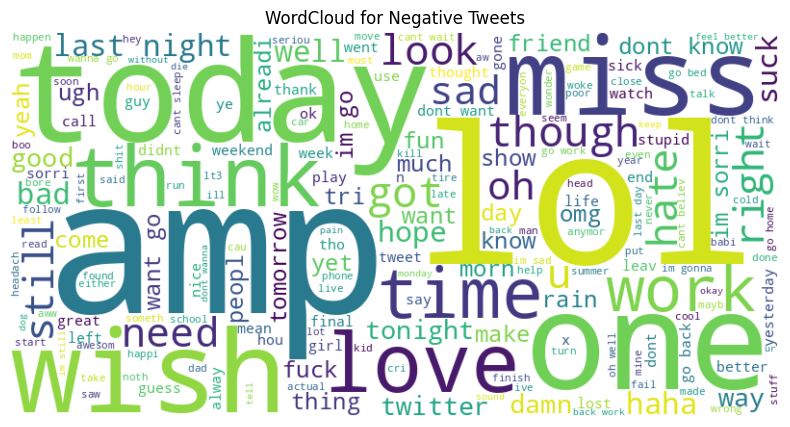

In [39]:
negative_tweets = sentiment_data[sentiment_data['target'] == 0]['text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweets))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Negative Tweets')
plt.axis('off')
plt.show()


**8. Plot WordCloud for positive tweets.**
---
---



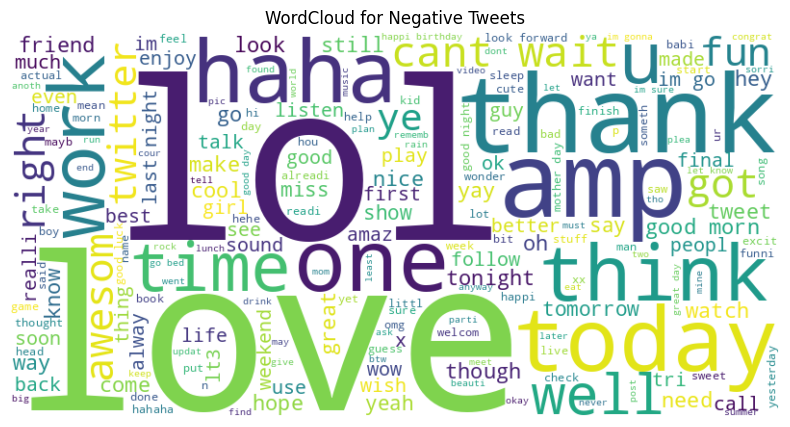

In [45]:
positive_tweets = sentiment_data[sentiment_data['target'] == 4]['text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Negative Tweets')
plt.axis('off')
plt.show()


**9. Generate a histogram for 50 most common words in negative tweets.**
---
---



In [41]:
# Creating a function to plot histograms
def plot_histogram(data, title):
    words, counts = zip(*data)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

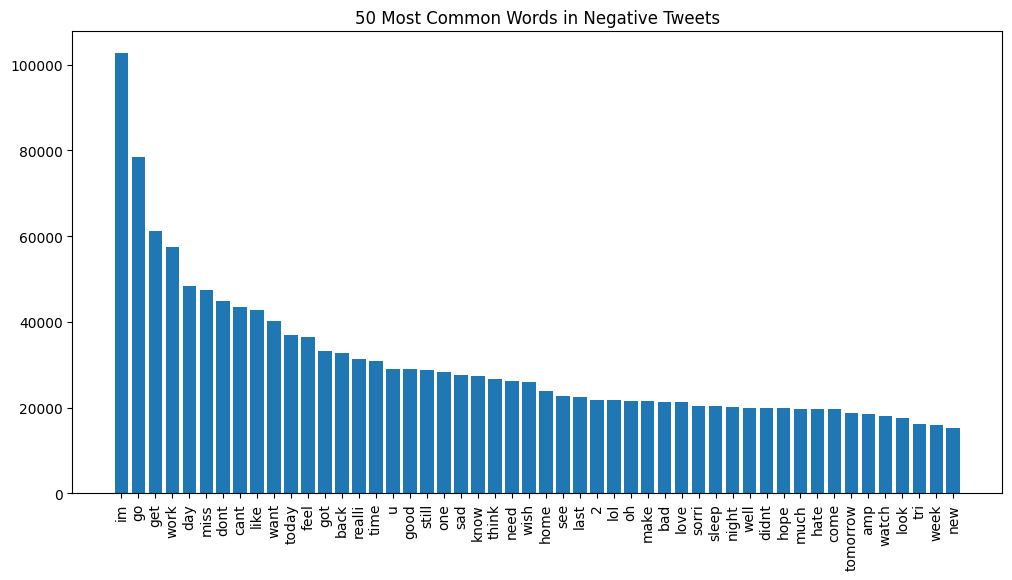

In [42]:
negative_tweets = sentiment_data[sentiment_data['target'] == 0]['text']
negative_word_counts = Counter(' '.join(negative_tweets).split())
most_common_negative_words = negative_word_counts.most_common(50)

plot_histogram(most_common_negative_words, '50 Most Common Words in Negative Tweets')

**10. Generate a histogram for 50 most common words in positive tweets.**
---
---



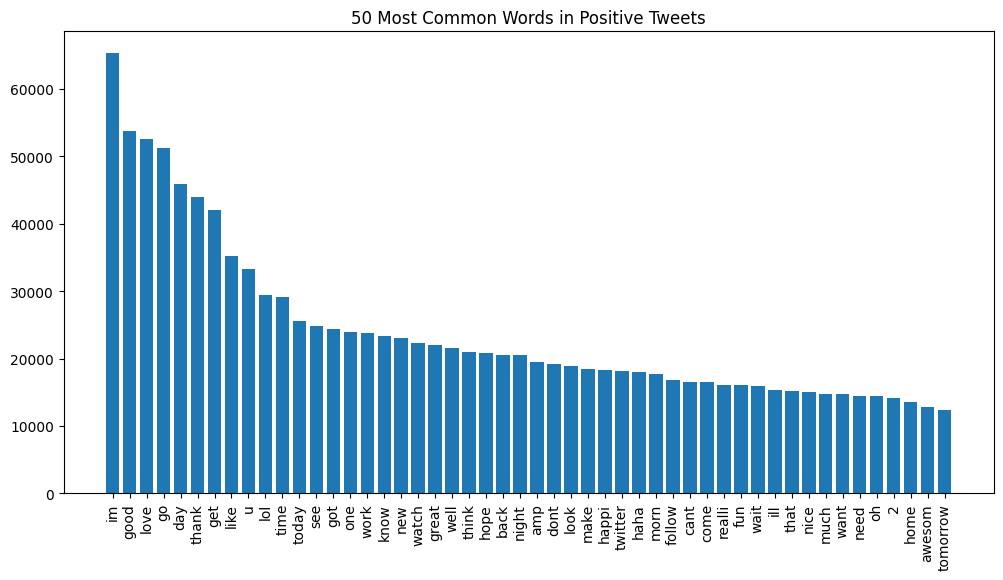

In [46]:
# Positive tweets
positive_tweets = sentiment_data[sentiment_data['target'] == 4]['text']
positive_word_counts = Counter(' '.join(positive_tweets).split())
most_common_positive_words = positive_word_counts.most_common(50)
plot_histogram(most_common_positive_words, '50 Most Common Words in Positive Tweets')